In [ ]:
# import hdf5 viewer
import h5py
import numpy as np
import os
from numpy import fft as fft
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [27]:
with h5py.File(r'C:\Users\Adrian\Documents\fus_instruments_repos\summer_2024\testpad\transducer\612_T550H825_sweep_550kHz_01.hdf5') as f:
    scan_group = f['Scan']

    raw_pressure_waveforms = scan_group['Raw pressure waveforms (Pa)'][:]

    print(raw_pressure_waveforms.shape)

    #print the header of the file

    # store data in a pandas dataframe
    df = pd.DataFrame(raw_pressure_waveforms)
    print(df[0].head()) 

(74, 10000)
0   -5168.424320
1     110.248830
2    -290.934413
3   -3876.573446
4   -2027.353486
Name: 0, dtype: float64


In [14]:
# create a numpy array to match the length of raw pressure wave form at 16 ns intervals
time = np.arange(0, 16*raw_pressure_waveforms.shape[1], 16)

# print first few values of time
print(time[:10])

[  0  16  32  48  64  80  96 112 128 144]


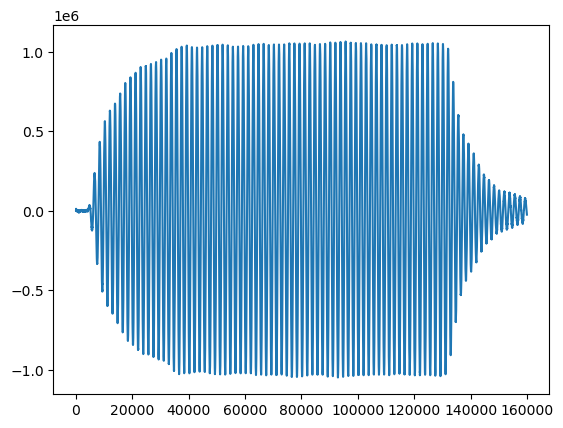

In [53]:
# plot a waveform
plt.figure()
plt.plot(time, raw_pressure_waveforms[73].T)

In [48]:
# in raw_pressure_waveform, find the row with the highest average value
average_waveform = np.mean(raw_pressure_waveforms, axis=1)
max_index = np.argmax(average_waveform)
print(max_index)

4


In [51]:
# find the row with the highest peak value
peak_waveform = np.max(raw_pressure_waveforms, axis=1)
max_index_peak = np.argmax(peak_waveform)
print(max_index_peak)

73


In [30]:
raw_pressure_waveforms.shape[1]

10000

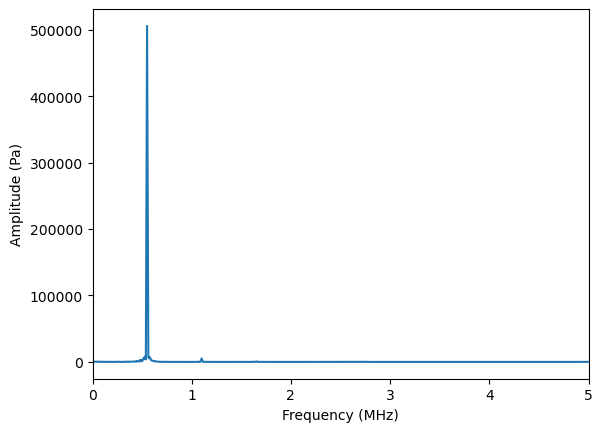

In [54]:
# apply a hanning window to the data
num_fft_pts = raw_pressure_waveforms.shape[1]
time_dt = 16e-9
window_fft = np.hanning(num_fft_pts)

windowed_data = raw_pressure_waveforms * window_fft

real_fft_magnitude = np.fft.rfft(raw_pressure_waveforms * window_fft, axis=1)

fft_wf = np.abs(2.00 * real_fft_magnitude / num_fft_pts)
fft_freq_MHz = np.fft.rfftfreq(n=num_fft_pts, d=time_dt) / 1e6


plt.plot(fft_freq_MHz, fft_wf[73].T)
plt.xlim(0, 5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude (Pa)")
plt.show()